In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 4.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7cf670967fc2bb87e31f0f4d7469e9ac7749b5196524dc1ca7f8e43bfdf8e4a4
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5a603208e7429387acadd8bc3ebc195459c36b7e6a6eb270ad662c7364030595
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import pycountry
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Authentication
consumerKey = "@@@@"
consumerSecret = "@@@@"
accessToken = "@@@@"
accessTokenSecret = "@@@@"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Ukraine russia
Please enter how many tweets to analyze: 400


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  400
positive number:  104
negative number:  205
neutral number:  91


In [ ]:
tweet_list

,0
0,"RT @CATSELFmusic: ""It seems that Western leade..."
1,RT @R132PZM7u7iZTYk: Russia’s invasion of Ukra...
2,"RT @jcokechukwu: EARLIER, Russian missiles ble..."
3,RT @cnni: The global implications of the war i...
4,RT @CNN: The global implications of the war in...
...,...
395,RT @SCMPNews: With US distracted by Russia’s U...
396,RT @KyivIndependent: ⚡️ Energy Ministry: Russi...
397,RT @POTUS: A dictator bent on rebuilding an em...
398,@ggreenwald @chrislhayes I think when Russia i...


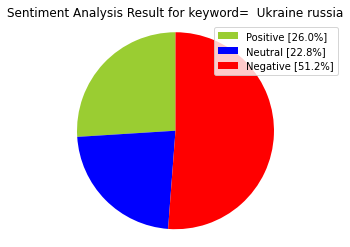

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @CATSELFmusic: ""It seems that Western leade...",it seems that western leadership knows that ...
1,RT @R132PZM7u7iZTYk: Russia’s invasion of Ukra...,russia s invasion of ukraine has diverted int...
2,"RT @jcokechukwu: EARLIER, Russian missiles ble...",earlier russian missiles blew up the command...
3,RT @cnni: The global implications of the war i...,the global implications of the war in europe ...
4,RT @CNN: The global implications of the war in...,the global implications of the war in europe ...
5,Lavrov says Russia will continue Ukraine war t...,lavrov says russia will continue ukraine war t...
7,Eastern Ukraine separatist leader calls for vo...,eastern ukraine separatist leader calls for vo...
8,RT @Salmon_Ten: 拜登警告说，全球粮食短缺将成为现实。\n\nUkraine ...,ukraine invasion biden w...
9,#Ukraine #Russia #RussiaInvadedUkraine #russia...,ukraine russia russiainvadedukraine russia...
10,RT @KyivIndependent: ⚡️ Zelensky: If Ukraine d...,zelensky if ukraine doesn t receive plane...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @CATSELFmusic: ""It seems that Western leade...",it seems that western leadership knows that ...,0.0500,0.2000,positive,0.088,0.721,0.191,0.3182
1,RT @R132PZM7u7iZTYk: Russia’s invasion of Ukra...,russia s invasion of ukraine has diverted int...,0.0000,0.5000,negative,0.157,0.843,0.000,-0.3818
2,"RT @jcokechukwu: EARLIER, Russian missiles ble...",earlier russian missiles blew up the command...,0.0000,0.2000,negative,0.170,0.830,0.000,-0.5413
3,RT @cnni: The global implications of the war i...,the global implications of the war in europe ...,-0.1000,0.1000,negative,0.241,0.664,0.094,-0.6369
4,RT @CNN: The global implications of the war in...,the global implications of the war in europe ...,-0.1000,0.1000,negative,0.250,0.652,0.098,-0.6369
5,Lavrov says Russia will continue Ukraine war t...,lavrov says russia will continue ukraine war t...,0.0000,0.0000,negative,0.281,0.719,0.000,-0.5994
7,Eastern Ukraine separatist leader calls for vo...,eastern ukraine separatist leader calls for vo...,0.0000,0.0000,neutral,0.000,1.000,0.000,0.0000
8,RT @Salmon_Ten: 拜登警告说，全球粮食短缺将成为现实。\n\nUkraine ...,ukraine invasion biden w...,0.1875,0.4875,negative,0.318,0.578,0.104,-0.4019
9,#Ukraine #Russia #RussiaInvadedUkraine #russia...,ukraine russia russiainvadedukraine russia...,0.0000,0.0000,neutral,0.000,1.000,0.000,0.0000
10,RT @KyivIndependent: ⚡️ Zelensky: If Ukraine d...,zelensky if ukraine doesn t receive plane...,0.0000,0.0000,negative,0.167,0.833,0.000,-0.3818


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,124,48.06
positive,74,28.68
neutral,60,23.26


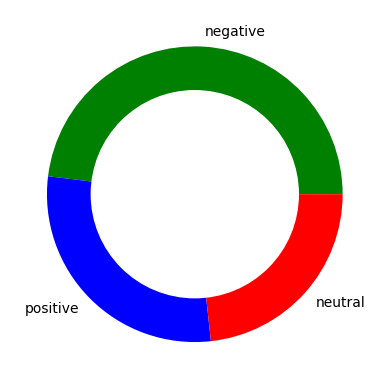

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


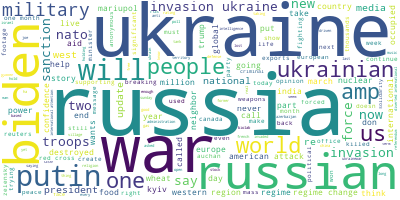

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


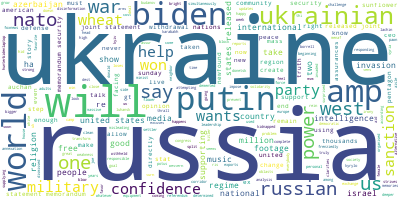

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


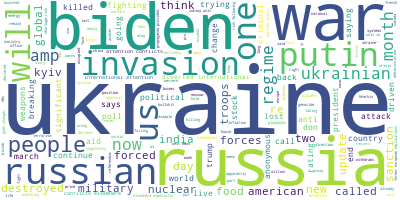

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


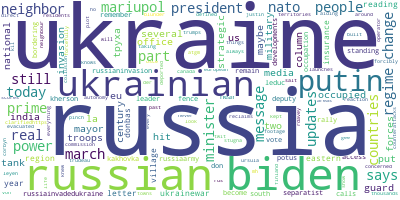

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,115.26
neutral,96.20
positive,114.31


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.76
neutral,14.00
positive,19.01


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
import nltk
nltk.downloader.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"RT @CATSELFmusic: ""It seems that Western leade...",it seems that western leadership knows that ...,0.05,0.2,positive,0.088,0.721,0.191,0.3182,123,22,it seems that western leadership knows that ...,"[, it, seems, that, western, leadership, knows...","[, seems, western, leadership, knows, russia, ...","[, seem, western, leadership, know, russia, go..."
1,RT @R132PZM7u7iZTYk: Russia’s invasion of Ukra...,russia s invasion of ukraine has diverted int...,0.00,0.5,negative,0.157,0.843,0.000,-0.3818,120,16,russia s invasion of ukraine has diverted int...,"[, russia, s, invasion, of, ukraine, has, dive...","[, russia, invasion, ukraine, diverted, intern...","[, russia, invas, ukrain, divert, intern, atte..."
2,"RT @jcokechukwu: EARLIER, Russian missiles ble...",earlier russian missiles blew up the command...,0.00,0.2,negative,0.170,0.830,0.000,-0.5413,128,19,earlier russian missiles blew up the command...,"[, earlier, russian, missiles, blew, up, the, ...","[, earlier, russian, missiles, blew, command, ...","[, earlier, russian, missil, blew, command, ce..."
3,RT @cnni: The global implications of the war i...,the global implications of the war in europe ...,-0.10,0.1,negative,0.241,0.664,0.094,-0.6369,131,22,the global implications of the war in europe ...,"[, the, global, implications, of, the, war, in...","[, global, implications, war, europe, forced, ...","[, global, implic, war, europ, forc, candid, u..."
4,RT @CNN: The global implications of the war in...,the global implications of the war in europe ...,-0.10,0.1,negative,0.250,0.652,0.098,-0.6369,131,21,the global implications of the war in europe ...,"[, the, global, implications, of, the, war, in...","[, global, implications, war, europe, forced, ...","[, global, implic, war, europ, forc, candid, p..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

258 Number of reviews has 1265 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abandon,abcnew,access,accident,acco,accord,account,accountabl,across,...,yve,z,zelenski,zelenskyy,zelinski,zolotov,zone,zurich,zx,zyk
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
russia,167
ukrain,159
war,43
russian,32
biden,29
putin,25
invas,20
ukrainian,18
one,16
us,16


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('russia ukraine', 16),
 ('ukraine russia', 14),
 ('invasion ukraine', 12),
 ('russia invasion', 10),
 ('ukraine war', 7),
 ('war ukraine', 7),
 ('regime change', 7),
 ('war russia', 5),
 ('change russia', 5),
 ('biden says', 4),
 ('russia amp', 4),
 ('supporting ukraine', 4),
 ('russia war', 4),
 ('red cross', 4),
 ('ukraine diverted', 3),
 ('diverted international', 3),
 ('international attention', 3),
 ('attention conflicts', 3),
 ('conflicts especially', 3),
 ('remain power', 3)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('russia invasion ukraine', 9),
 ('russia ukraine war', 6),
 ('regime change russia', 5),
 ('invasion ukraine diverted', 3),
 ('ukraine diverted international', 3),
 ('diverted international attention', 3),
 ('international attention conflicts', 3),
 ('attention conflicts especially', 3),
 ('war russia ukraine', 3),
 ('2009 russia amp', 3),
 ('russia amp united', 3),
 ('amp united states', 3),
 ('united states released', 3),
 ('states released joint', 3),
 ('released joint statement', 3),
 ('joint statement memorandum', 3),
 ('statement memorandum security', 3),
 ('conflicts especially genocide', 2),
 ('global implications war', 2),
 ('implications war europe', 2)]